   RAM  CPU_speed  GPU_score  Storage  Display_inches  Price
0    8        2.5       1500      256              13    900
1   16        3.0       2000      512              15   1200
2   32        3.5       2500     1000              17   1600
3   64        4.0       3000     2000              16   2500
Intercept: 1384.044131682926
Coefficients:
  RAM: 48.32
  CPU_speed: 77.24
  GPU_score: 77.24
  Storage: 48.18
  Display_inches: 116.78

R2 Score: 0.425
Mean Absolute Error: 364.52


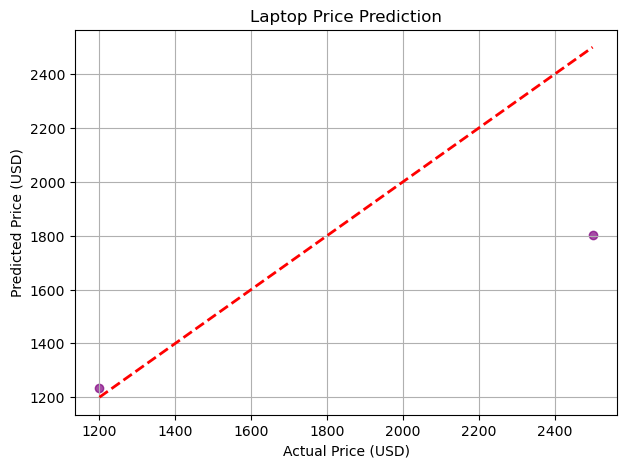

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

# --------------------------
# 1️⃣ بارگذاری داده
# --------------------------
df = pd.read_csv("../data/laptops.csv")
print(df.head())

# --------------------------
# 2️⃣ آماده‌سازی داده
# --------------------------
X = df[["RAM", "CPU_speed", "GPU_score", "Storage", "Display_inches"]]
y = df["Price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# --------------------------
# 3️⃣ مدل رگرسیون
# --------------------------
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# --------------------------
# 4️⃣ ارزیابی مدل
# --------------------------
print("Intercept:", model.intercept_)
print("Coefficients:")
for name, coef in zip(X.columns, model.coef_):
    print(f"  {name}: {coef:.2f}")

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nR2 Score: {r2:.3f}")
print(f"Mean Absolute Error: {mae:.2f}")

# --------------------------
# 5️⃣ نمودار واقعی vs پیش‌بینی
# --------------------------
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color="purple", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Laptop Price Prediction")
plt.grid(True)
plt.show()
